# **Welcome to the Final Project of Winter Bootcamp**

## Project: Telco Customer Churn Prediction

In the telecommunications industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.

- The Business Pain Point:
Acquiring a new customer is estimated to be 5 to 25 times more expensive than retaining an existing one. Therefore, for a Telco company, Customer Retention is the most critical strategy to maximize profit.

- The Goal:
The management wants to reduce customer churn by identifying customers who are likely to leave before they actually leave. If we can predict who is at risk, the marketing team can offer them special discounts or better plans to keep them.

2. Problem Statement

- Objective: Develop a Machine Learning solution to predict whether a customer will Churn (leave the company) or Stay based on their account information, demographic details, and service usage.

3. The Dataset

We will use the Telco Customer Churn dataset.

Source: [Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)



**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Task: Reading and Exploring the Data**

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

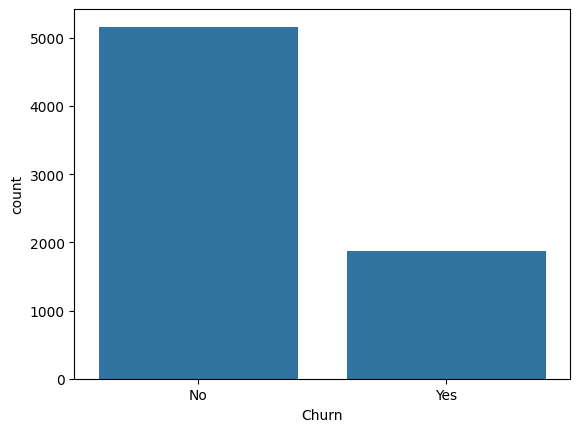

In [7]:
sns.countplot(data=df,x='Churn')

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

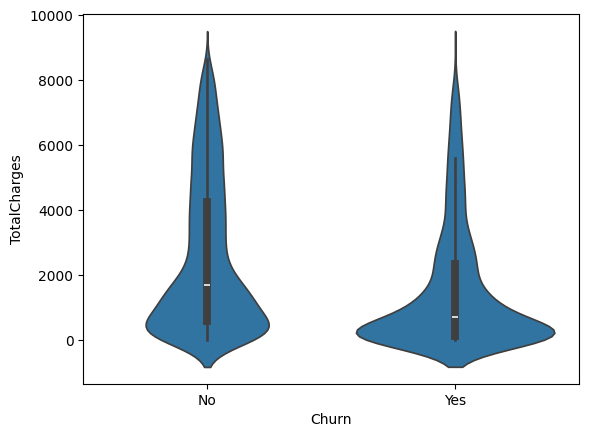

In [8]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

The Violin Plot reveals that **Total Charges** is a strong indicator of churn risk, acting as a proxy for customer loyalty/tenure.

| Inference | Churn = No (Stayed) | Churn = Yes (Left) |
| :--- | :--- | :--- |
| **Density Peak** | The distribution peaks at **high Total Charges** (approx. \$2,000 - \$4,000). | The distribution is heavily concentrated at **very low Total Charges** (primarily under \$1,000). |
| **Correlation** | Customers with accumulated **high total charges** over their subscription lifetime are **less likely to churn**. | The majority of customers who churn are **low-value** or **new** customers. |
| **Actionable Insight** | High total charges create a strong **retention barrier**. The highest churn risk is clustered within the **new or short-term** customer segment. | |

***

### Conclusion:

There is a clear **negative correlation** between the accumulated amount a customer has paid and their likelihood of churning.

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

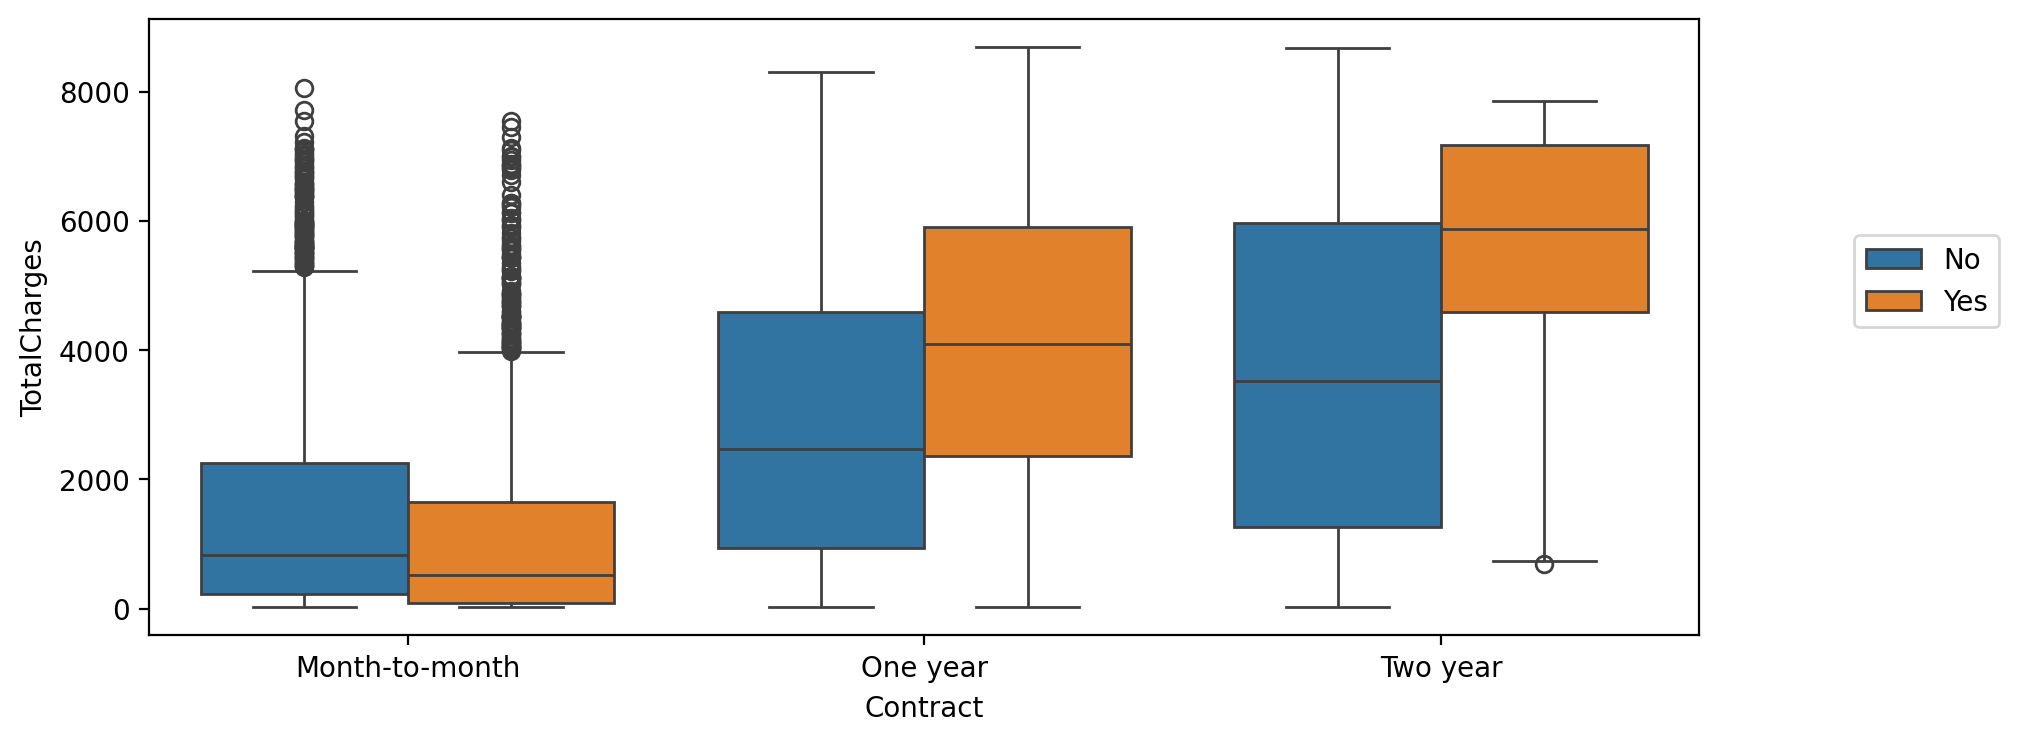

In [9]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

This Box Plot shows that the length of the customer's contract is the **single most dominant predictor** of the total revenue accumulated over the customer's lifetime.

| Inference | Month-to-month | One year | Two year |
| :--- | :--- | :--- | :--- |
| **Median Value** | **Lowest** (Median $\approx \$400$) | Mid-Range (Median $\approx \$1,600$) | **Highest** (Median $\approx \$3,000$) |
| **Customer Value** | **Low-Value Segment.** Most customers here accumulate very few charges before ending their contract (high churn risk). | **Mid-Value Segment.** Shows a wider range of charges, indicating moderate loyalty. | **High-Value Segment.** Represents the company's most loyal and revenue-producing customer base. |
| **Spread (IQR)** | **Most Concentrated.** The box (Interquartile Range) is very short, meaning most customers are clustered at the low end. | Wide IQR, indicating high variability in total charges. | **Widest Spread.** The largest IQR shows the highest overall range in customer value, reflecting longer tenure. |
| **Outliers** | Shows many high outliers, meaning the few long-term customers who stay month-to-month are **exceptions** to the rule. | Very few high outliers, as most high-value customers are captured within the main box. | |

***

### Conclusion:

Contract length acts as a strong measure of **customer loyalty and retention**. Shifting customers from 'Month-to-month' plans to 'One year' or 'Two year' plans is the most effective strategy to significantly increase customer lifetime value.

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [10]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [11]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

,Churn_Yes
Contract_Two year,-0.301552
InternetService_No,-0.227578
DeviceProtection_No internet service,-0.227578
TechSupport_No internet service,-0.227578
OnlineSecurity_No internet service,-0.227578
StreamingMovies_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
OnlineBackup_No internet service,-0.227578
PaperlessBilling_No,-0.191454
Contract_One year,-0.178225


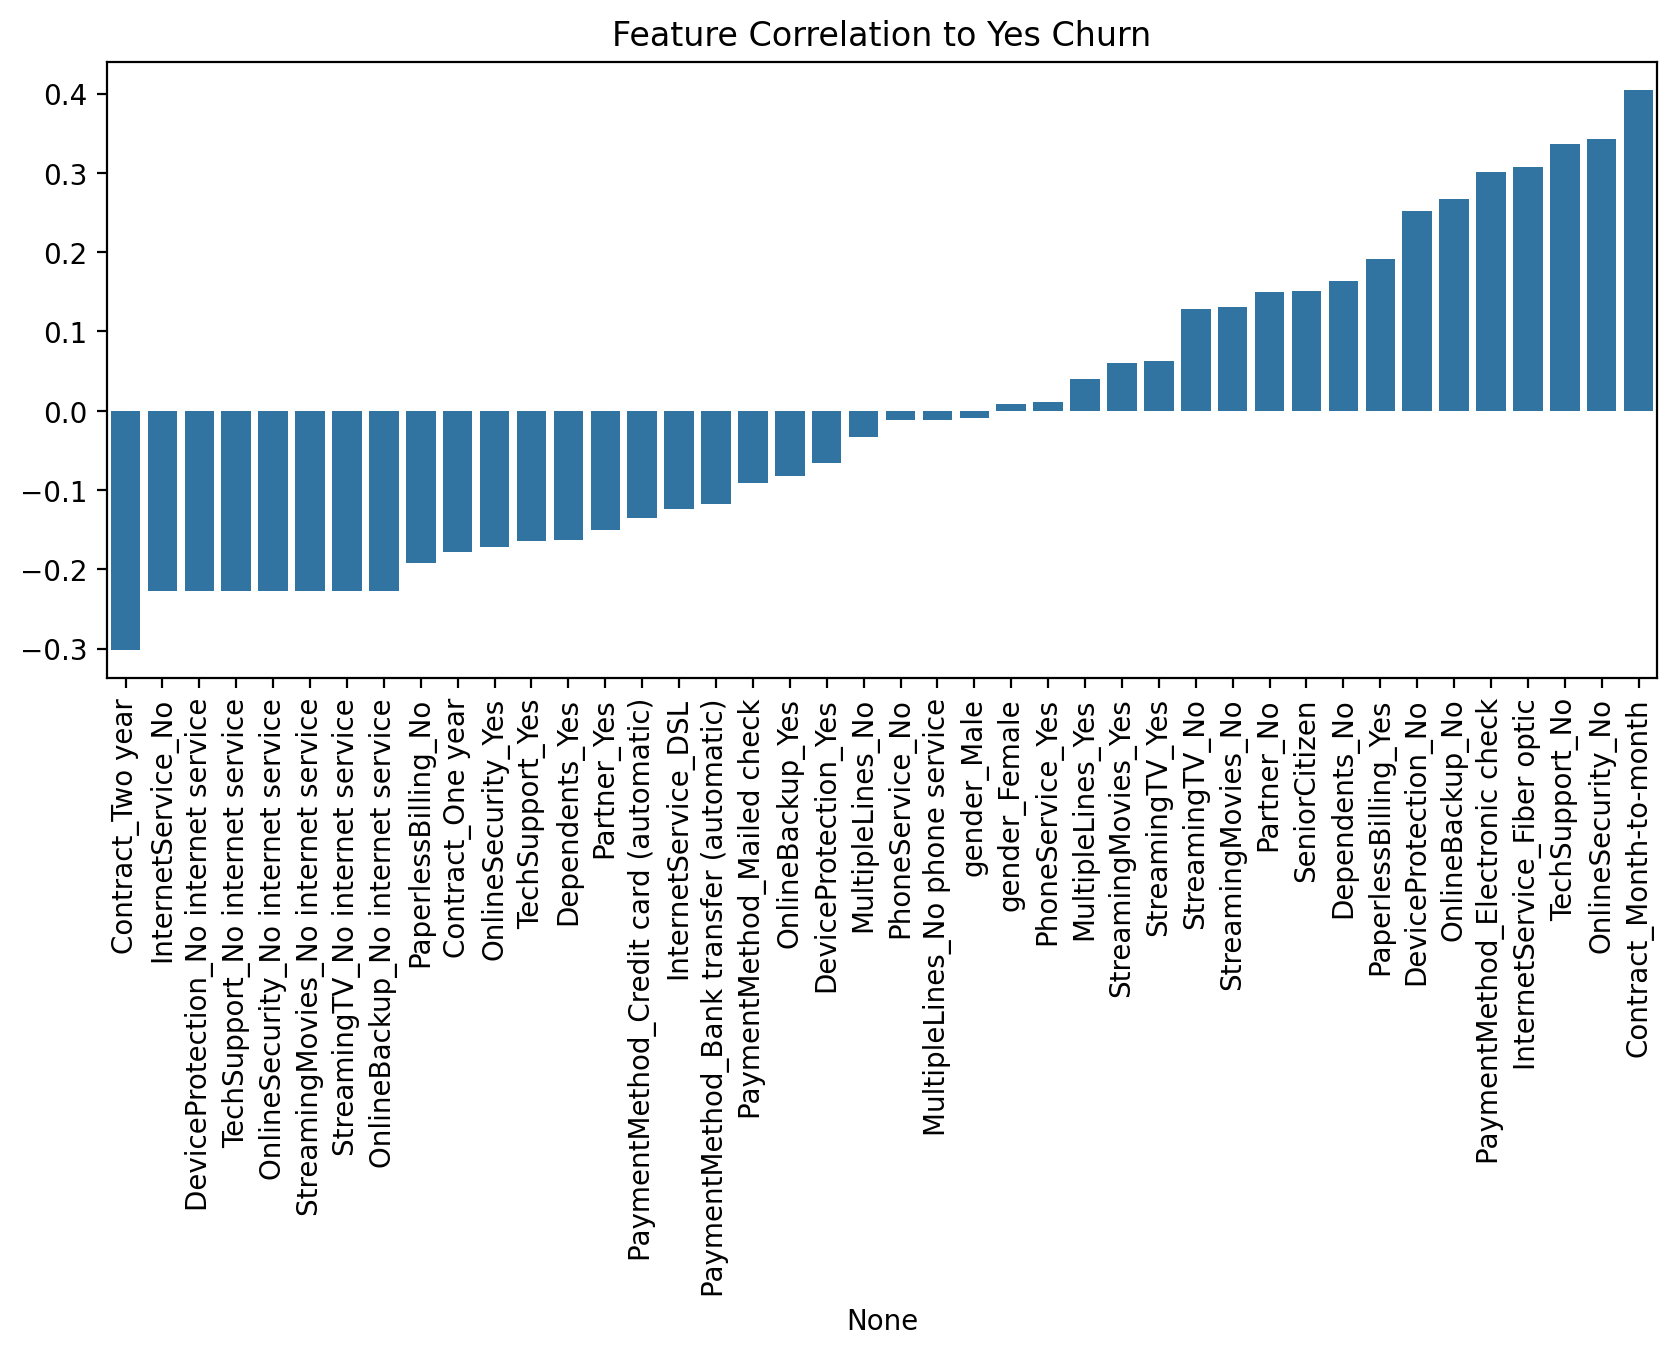

In [12]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

# Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [13]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

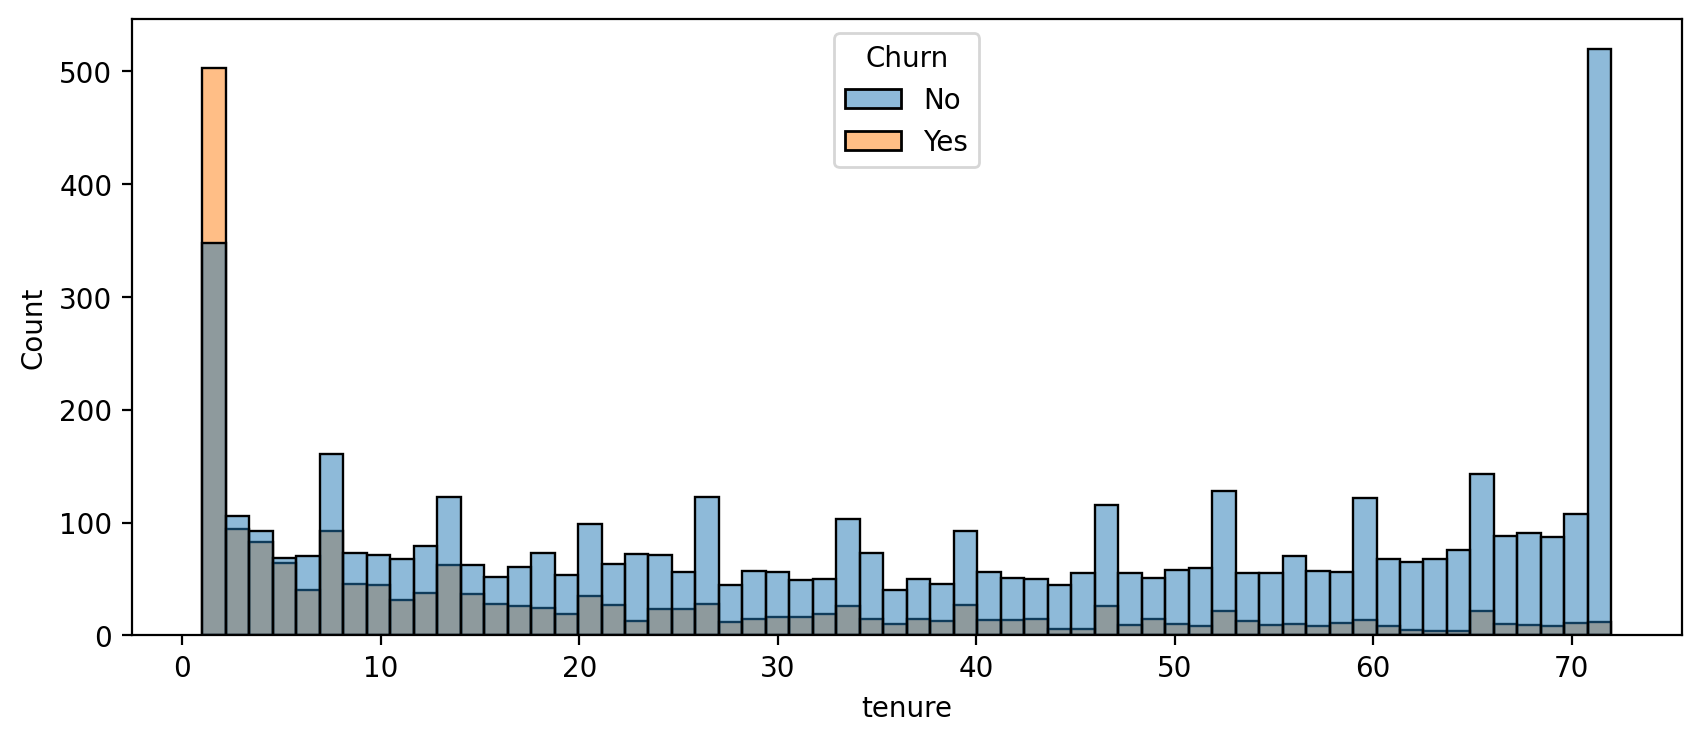

In [14]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',hue='Churn',bins=60)

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 2000x600 with 0 Axes>

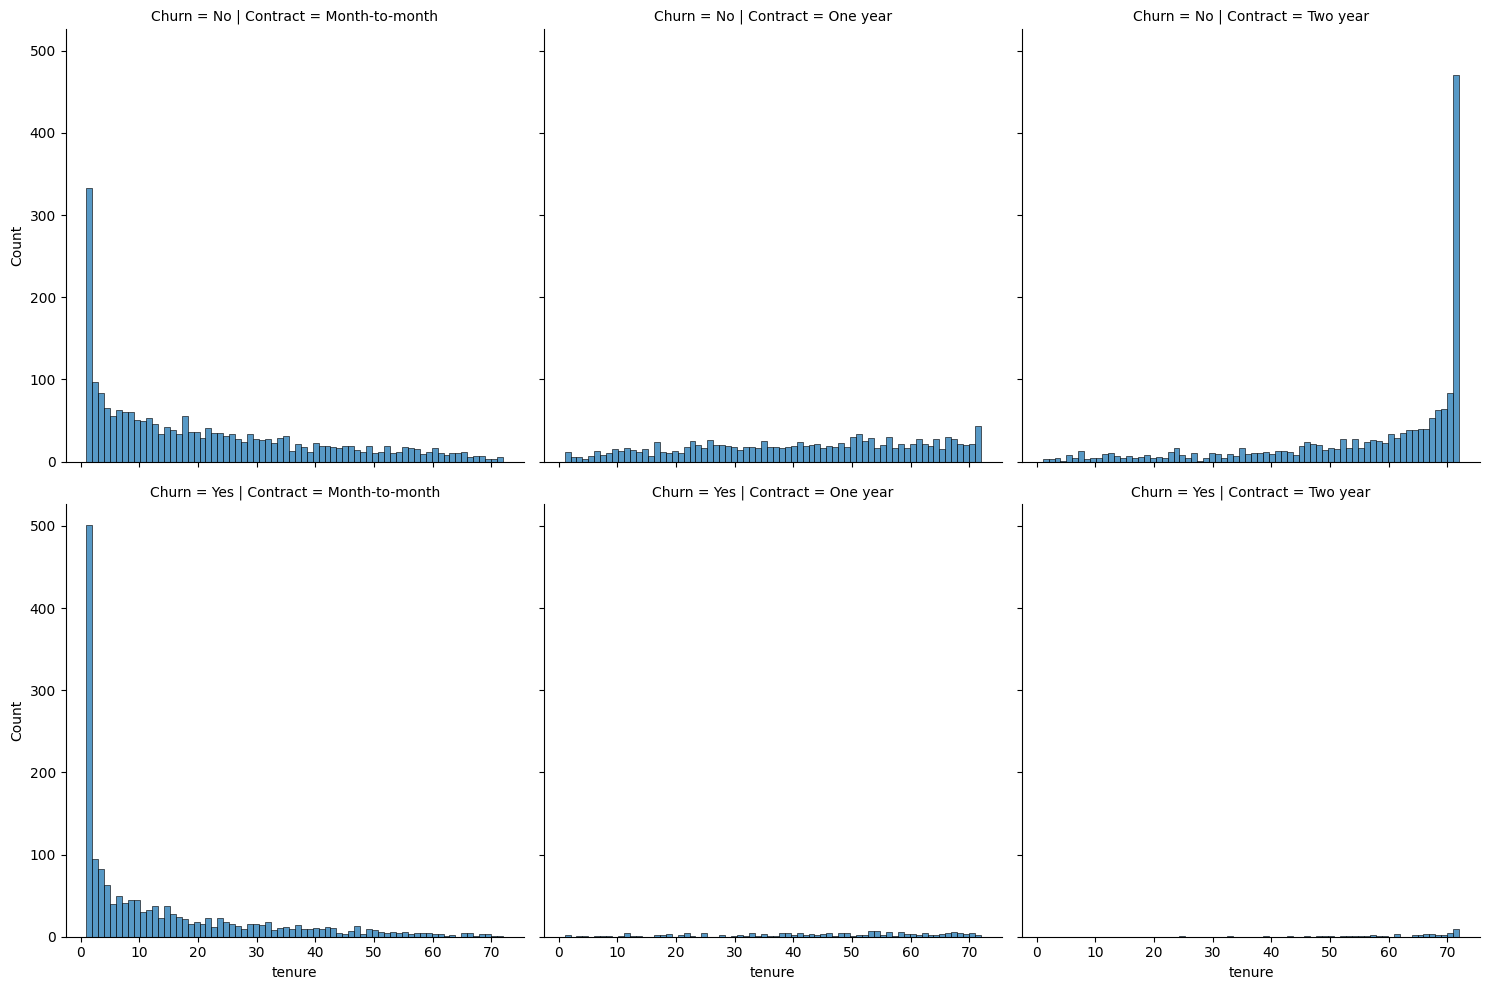

In [15]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

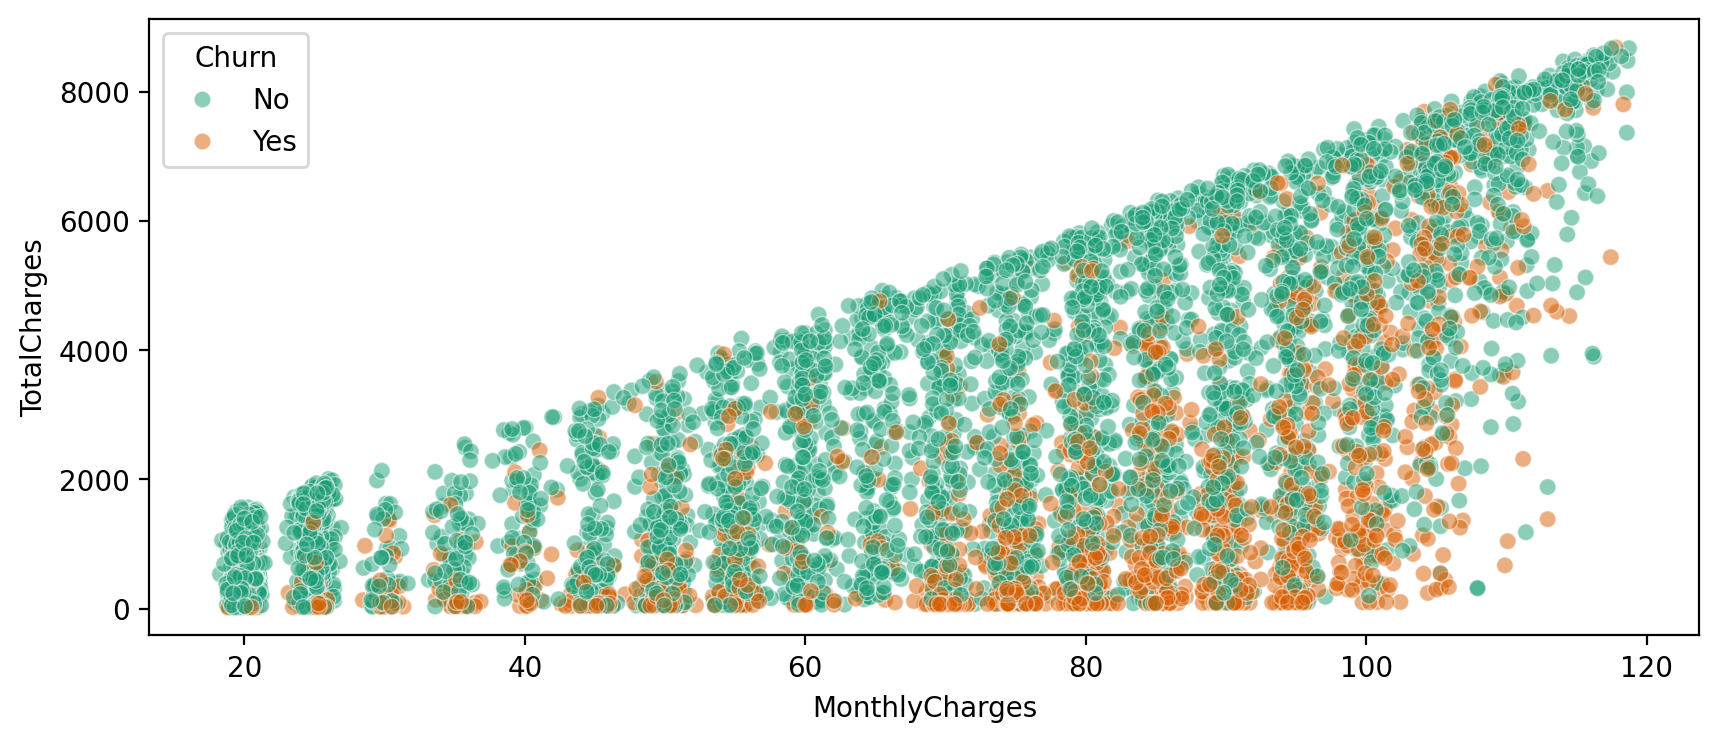

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5,palette='Dark2')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [17]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [18]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [19]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [20]:
churn_rate.transpose()['customerID']

,customerID
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

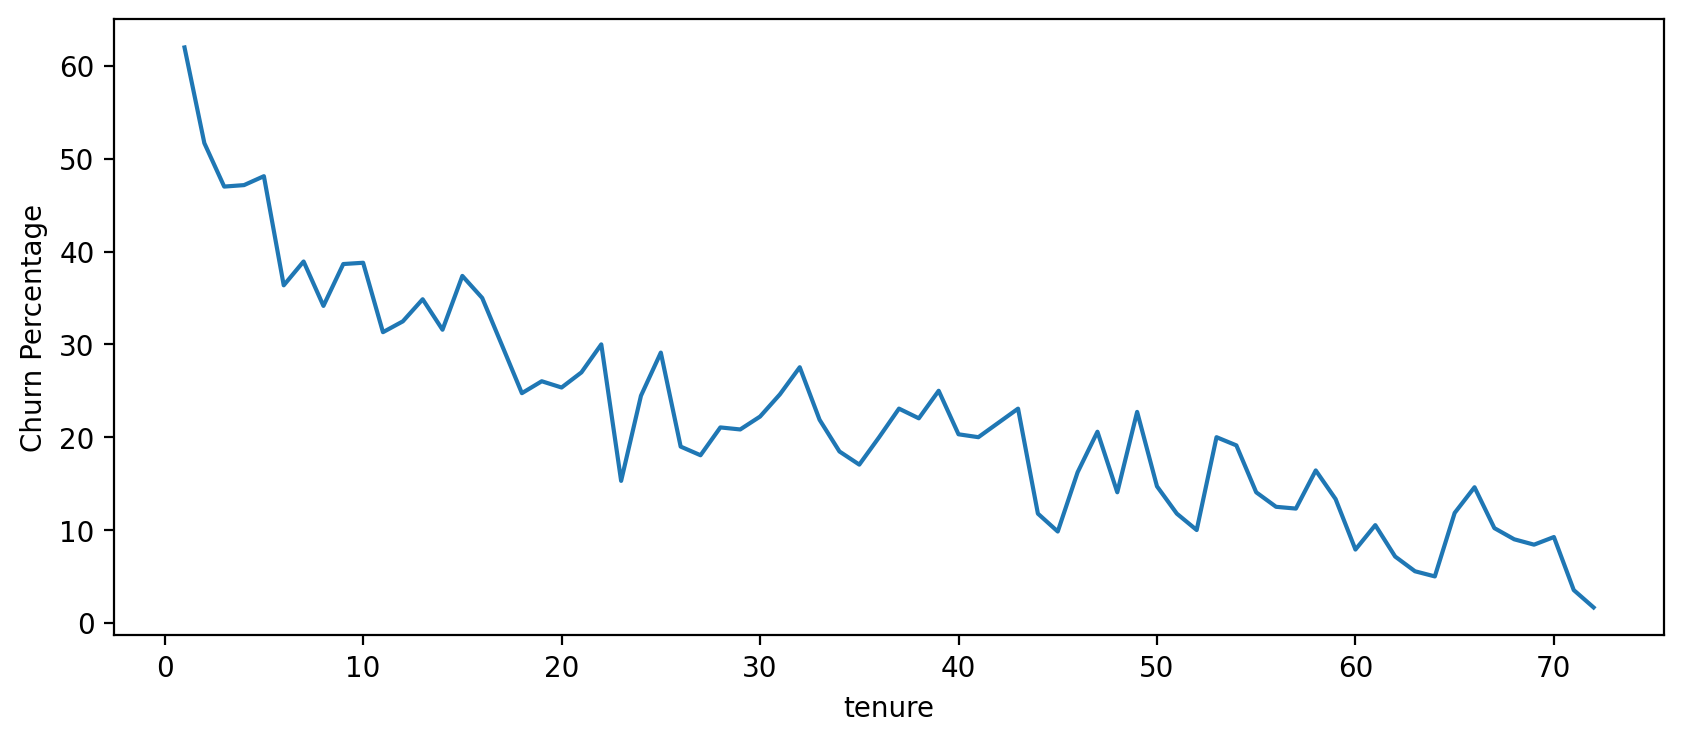

In [21]:
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=churn_rate.iloc[0])
plt.ylabel('Churn Percentage');

## Feature Engineering

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '24-48 Months'
   * '12-24 Months'
   * 'Over 48 Months'    

In [22]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [23]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

**Task**
- Create 'Family' column
- Logic: Partner (1/0) + Dependents (1/0)
- Result: 0 = Single, 1 = Has Partner OR Child, 2 = Has Both

In [24]:
df['Family'] = (df['Partner'] == 'Yes').astype(int) + (df['Dependents'] == 'Yes').astype(int)

**Task**
- Create 'ServiceCount' column (How many products or services do they buy?)

In [25]:
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

df['ServiceCount'] = df[services].apply(lambda x: (x == 'Yes').sum(), axis=1)

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

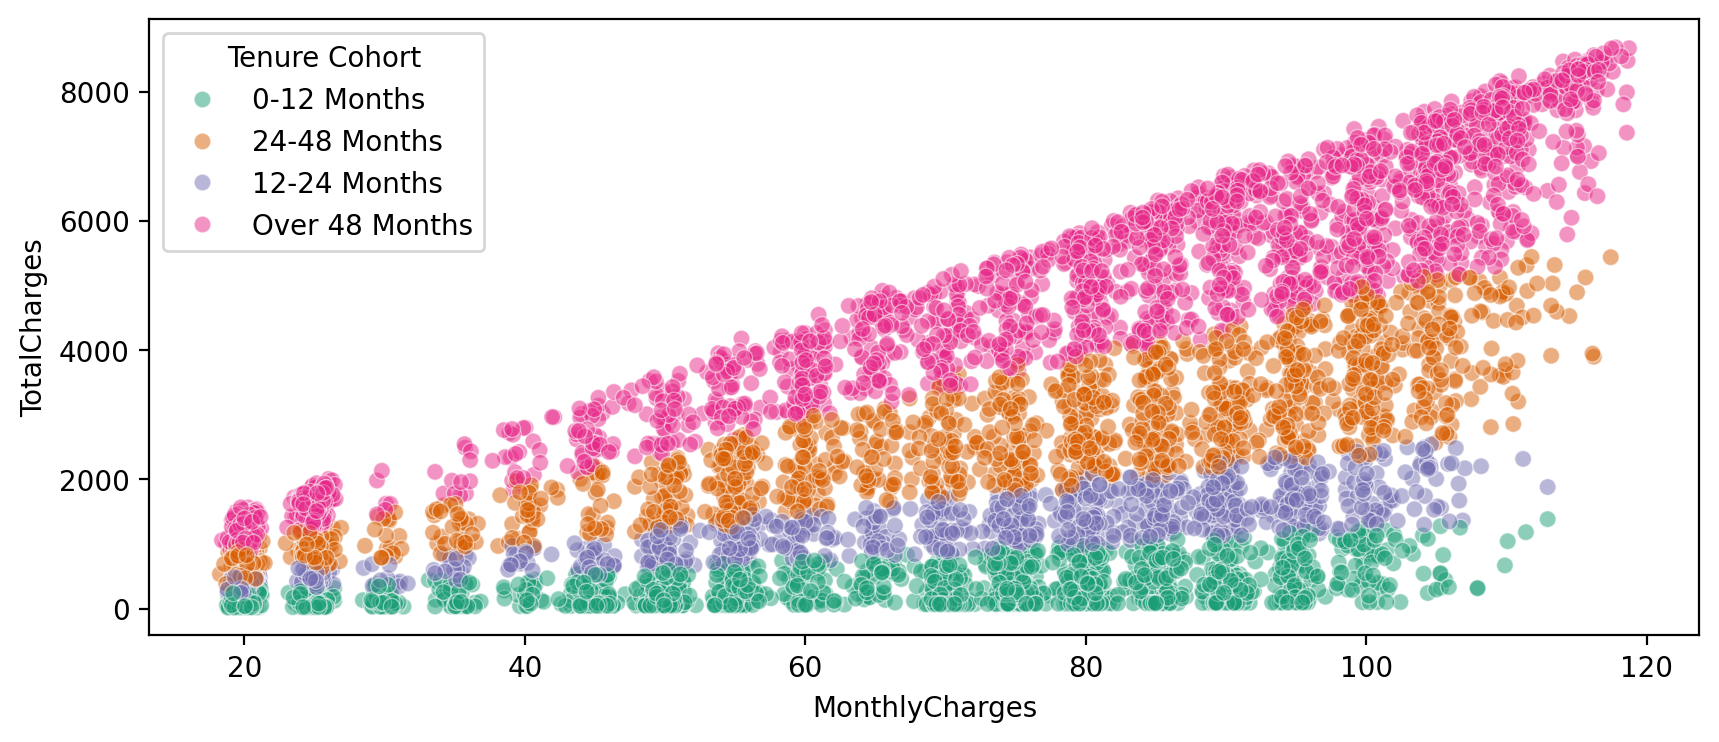

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.5,palette='Dark2')

**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

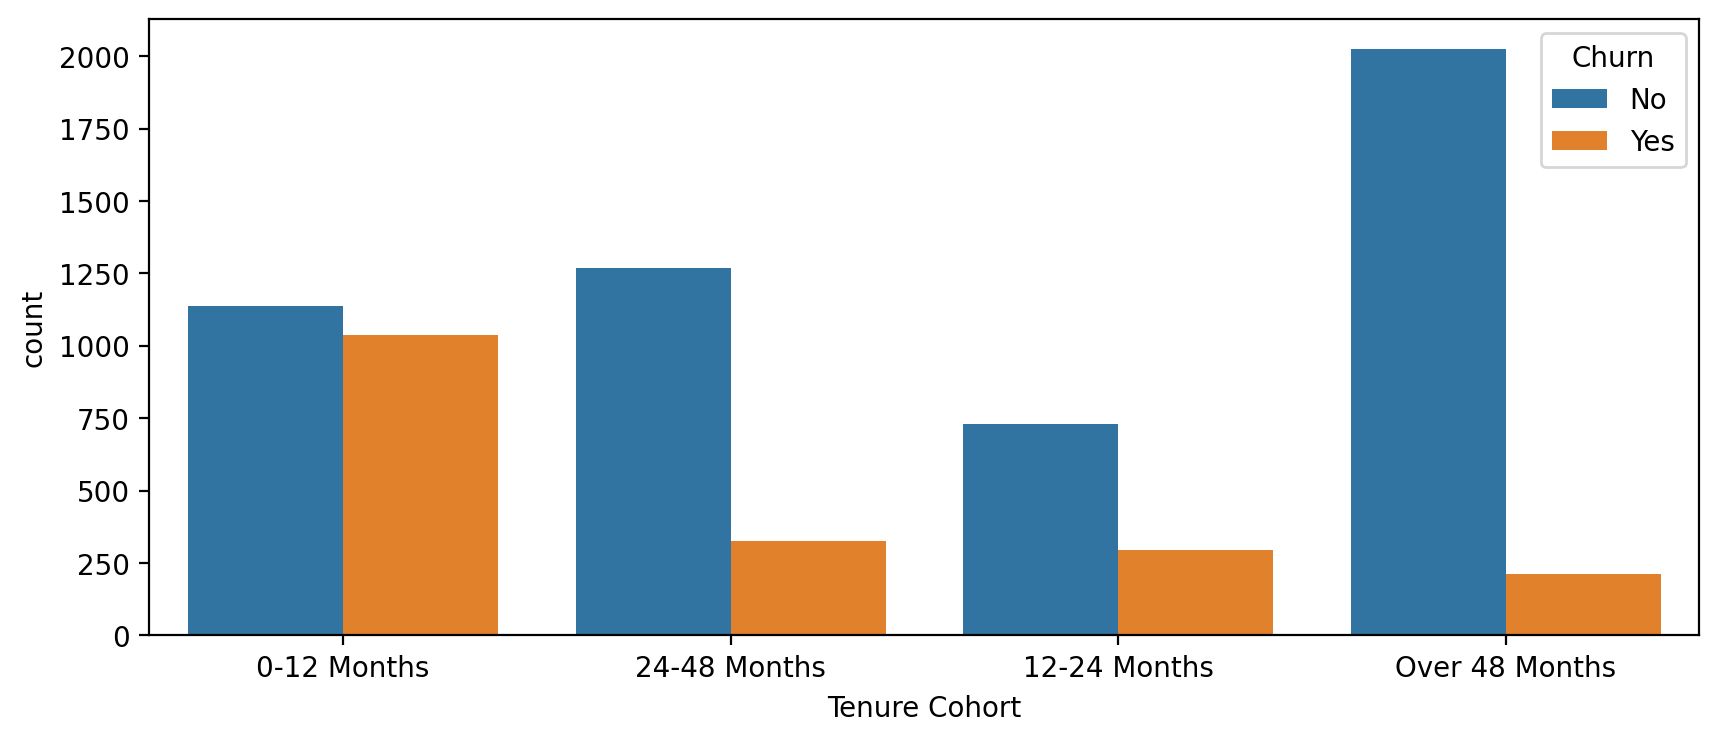

In [27]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

In [28]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Predictive Modeling

**Let's explore different classification based methods**


**TASK: Import the libraries required for making pipelines, scaling, encoding, spliting the data and applying grid search**

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Task: Train Test Split**

In [30]:
X = df.drop(['customerID','Churn'],axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task: Using ColumnTransformer do Preproocessing of the coulumns**

In [32]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
    ]
)

**Task: Import all the required models and define the model parameters needed to pass to the Grid Search**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score

model_params = {
    # solver='liblinear': The calculation engine. Needed to use 'l1' (Lasso) penalty.
    # class_weight='balanced': Forces model to pay more attention to the minority class (e.g., Churners).
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
        'params': {
            # C: Inverse of regularization strength.
            # High (100) = Strict (Must fit training data perfectly). Low (0.01) = Relaxed (Allow errors to capture general trend).
            'classifier__C': [0.01, 0.1, 1, 10, 100],

            # Penalty: How we punish complex models.
            # 'l1' (Lasso) = can remove features (set coef to 0). 'l2' (Ridge) = just shrinks coefs.
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            # Var Smoothing: Adds a tiny value to variances to prevent division by zero errors.
            # Helps when a feature has 0 variance in a specific class.
            'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    'SVM': {
        # probability=True: SVM usually calculates distance, not %. This forces it to calculate a % probability.
        'model': SVC(random_state=42, class_weight='balanced', probability=True),
        'params': {
            # C: Penalty for misclassifying a point.
            # High C = Strict (risk of overfitting). Low C = Soft margin (allows some errors).
            'classifier__C': [0.1, 1, 10],

            # Kernel: The math used to project data into higher dimensions.
            'classifier__kernel': ['rbf', 'poly'],

            # Gamma: Defines how far the influence of a single training example reaches.
            # High Gamma = Only close points matter (islands). Low Gamma = Far points matter.
            'classifier__gamma': ['scale', 'auto', 0.1]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            # N Neighbors: The 'K' in KNN.
            # Low K = sensitive to noise. High K = smoother decision boundary.
            'classifier__n_neighbors': [3, 5, 9, 15],

            # Weights: How much vote does each neighbor get?
            # 'uniform' = all equal. 'distance' = closer neighbors have more influence.
            'classifier__weights': ['uniform', 'distance'],

            # P: The distance metric.
            # 1 = Manhattan (City block distance). 2 = Euclidean (Straight line).
            'classifier__p': [1, 2]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        'params': {
            # Max Depth: How deep the tree can grow.
            # None = unlimited (overfitting risk). Numbers restrict height.
            'classifier__max_depth': [5, 10, 20, None],

            # Min Samples Split: How many samples needed to justify splitting a node.
            # Higher = prevents creating tiny, specific branches.
            # If a group is smaller than this (e.g., 10 people), stop asking questions about them.
            'classifier__min_samples_split': [2, 10, 20],

            # Min Samples Leaf: Minimum samples required at a leaf node (end point).
            # Crucial for smoothing the model.
            'classifier__min_samples_leaf': [1, 5, 10]
        }
    },
    'Random Forest': {
        # Consists of many Decision Trees voting together.
        'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'params': {
            # N Estimators: Number of trees in the forest.
            # More is usually better, but slower.
            'classifier__n_estimators': [100, 200],

            # Max Features: How many features to look at when splitting.
            # 'sqrt' is standard. 'log2' looks at fewer features (more randomness).
            # Forces trees to be different from each other.
            'classifier__max_features': ['sqrt', 'log2'],

            # (Same as Decision Tree above)
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_leaf': [1, 4]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            # Learning Rate: "Step Size".
            # How quickly do we correct mistakes? High = aggressive correction. Low = slow, careful correction.
            'classifier__learning_rate': [0.01, 0.1, 1.0],
            'classifier__n_estimators': [50, 100, 200]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            # Subsample: Fraction of samples used for fitting the individual base learners.
            # < 1.0 results in Stochastic Gradient Boosting (reduces variance).
            # 0.8 means each tree only studies 80% of the data. Reduces memorization (overfitting).
            'classifier__subsample': [0.8, 1.0],

            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 8]
        }
    },
    'XGBoost': {
        # scale_pos_weight: The XGBoost version of class_weight='balanced'.
        # If you have 3x more No than Yes, set this to 3 to balance them.
        'model': XGBClassifier(random_state=42, scale_pos_weight=3),
        'params': {
            # Gamma: "Minimum Gain".
            # The tree will only make a new branch if it improves accuracy by at least this amount.
            'classifier__gamma': [0, 0.1, 0.2],

            # Colsample Bytree: Subsample ratio of columns when constructing each tree.
            # Similar to 'max_features' in Random Forest.
            # Fraction of columns to be randomly sampled for each tree.
            'classifier__colsample_bytree': [0.7, 1.0],

            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 6, 10]
        }
    }
}



  > Tuning Logistic Regression...
  > Tuning Naive Bayes...
  > Tuning SVM...
  > Tuning KNN...
  > Tuning Decision Tree...
  > Tuning Random Forest...
  > Tuning AdaBoost...
  > Tuning Gradient Boosting...
  > Tuning XGBoost...


**Train the models using Pipelines and GridSearch and store the scores for comparision**

In [ ]:
scores = []

for model_name, mp in model_params.items():
    print(f"  > Tuning {model_name}...")

    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', mp['model'])])

    clf = GridSearchCV(pipe, mp['params'], cv=5, scoring='recall', n_jobs=-1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    scores.append({
        'Model': model_name,
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': 0.0 if (recall_score(y_test, y_pred)+precision_score(y_test, y_pred))==0 else (2 * recall_score(y_test, y_pred) * precision_score(y_test, y_pred)) / (recall_score(y_test, y_pred) + precision_score(y_test, y_pred)),
        'Best Params': str(clf.best_params_)
    })

**Sort the Scores on basis of Recall and Plot a Barplot for model comparision and find the best model**

In [35]:
final_df = pd.DataFrame(scores).sort_values(by='Recall', ascending=False)

print(final_df[['Model', 'Recall', 'Precision', 'F1-Score']])

plt.figure(figsize=(14, 8))

melted_df = final_df.melt(id_vars='Model', value_vars=['Recall', 'Precision'], var_name='Metric', value_name='Score')

sns.barplot(x='Score', y='Model', hue='Metric', data=melted_df, palette='viridis')
plt.title('The Ultimate Model Showdown: Precision vs. Recall')
plt.axvline(0.80, color='red', linestyle='--', label='Target Recall (80%)')
plt.legend()
plt.show()

                 Model    Recall  Precision  F1-Score
1          Naive Bayes  0.831551   0.462798  0.594646
8              XGBoost  0.831551   0.464873  0.596357
2                  SVM  0.804813   0.484702  0.605025
0  Logistic Regression  0.794118   0.497487  0.611740
4        Decision Tree  0.737968   0.510166  0.603279
5        Random Forest  0.708556   0.511583  0.594170
3                  KNN  0.540107   0.583815  0.561111
6             AdaBoost  0.500000   0.631757  0.558209
7    Gradient Boosting  0.494652   0.640138  0.558069


In [36]:
final_df

,Model,Recall,Precision,F1-Score,Best Params
1,Naive Bayes,0.831551,0.462798,0.594646,{'classifier__var_smoothing': 1e-09}
8,XGBoost,0.831551,0.464873,0.596357,"{'classifier__colsample_bytree': 1.0, 'classif..."
2,SVM,0.804813,0.484702,0.605025,"{'classifier__C': 1, 'classifier__gamma': 'aut..."
0,Logistic Regression,0.794118,0.497487,0.611740,"{'classifier__C': 100, 'classifier__penalty': ..."
4,Decision Tree,0.737968,0.510166,0.603279,"{'classifier__max_depth': 5, 'classifier__min_..."
5,Random Forest,0.708556,0.511583,0.594170,"{'classifier__max_depth': 10, 'classifier__max..."
3,KNN,0.540107,0.583815,0.561111,"{'classifier__n_neighbors': 15, 'classifier__p..."
6,AdaBoost,0.500000,0.631757,0.558209,"{'classifier__learning_rate': 1.0, 'classifier..."
7,Gradient Boosting,0.494652,0.640138,0.558069,"{'classifier__learning_rate': 0.1, 'classifier..."


In [37]:
final_df.melt(id_vars='Model', value_vars=['Recall', 'Precision'], var_name='Metric', value_name='Score')


,Model,Metric,Score
0,Naive Bayes,Recall,0.831551
1,XGBoost,Recall,0.831551
2,SVM,Recall,0.804813
3,Logistic Regression,Recall,0.794118
4,Decision Tree,Recall,0.737968
5,Random Forest,Recall,0.708556
6,KNN,Recall,0.540107
7,AdaBoost,Recall,0.500000
8,Gradient Boosting,Recall,0.494652
9,Naive Bayes,Precision,0.462798
